Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")
import warnings
warnings.simplefilter("ignore")

In [27]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix


In [12]:
df=pd.read_csv("glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [13]:
# drop first column
df=df[df.columns[1:11]]
# Add columns name
df.columns=["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
df.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Class   213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [15]:
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518353   13.406761    2.676056    1.446526   72.655023    0.499108   
std      0.003039    0.818371    1.440453    0.499882    0.774052    0.653035   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.830000    3.600000    1.630000   73.090000    0.610000   
max      1.533930   17.380000    3.980000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe       Class  
count  213.000000  213.000000  213.000000  213.000000  
mean     8.957934    0.175869    0.057277    2.788732  
std      1.426435    0.498245    0.097589    2.105130  
min      5.430000    0.000000    0.000000    1

Text(0.5, 1.0, 'Plot 1.1 Boxplot Glass data set')

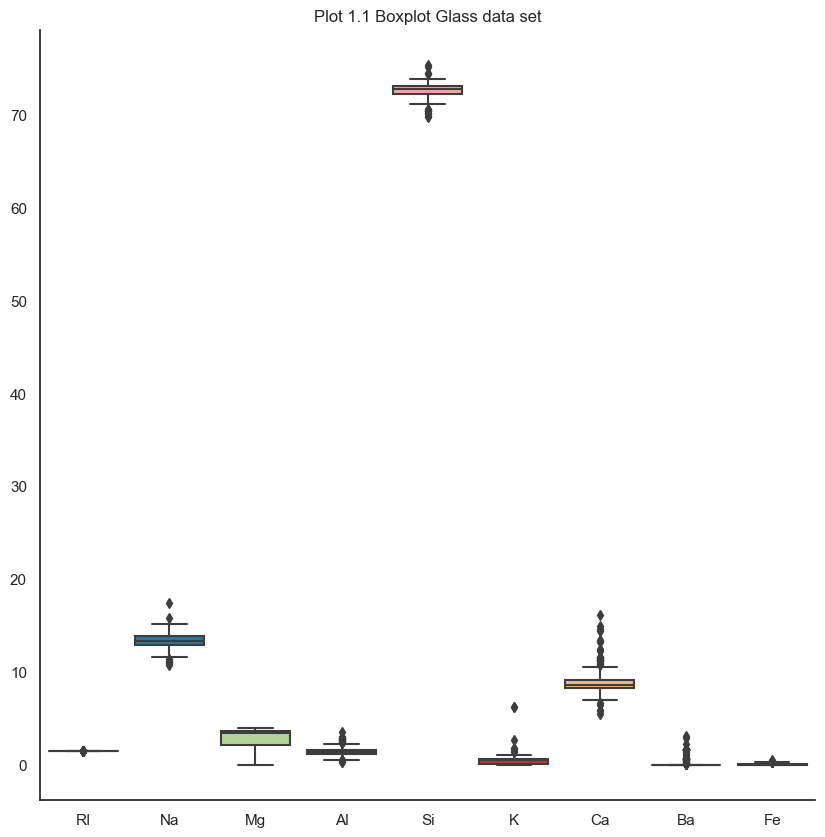

In [16]:
fig,ax=plt.subplots(figsize=(10, 10))
sns.boxplot(data=df.loc[:,"RI":"Fe"], palette='Paired',ax=ax)
sns.despine()
plt.title('Plot 1.1 Boxplot Glass data set')

Text(0.5, 0.98, 'Plot 1.2 Boxplot features by class')

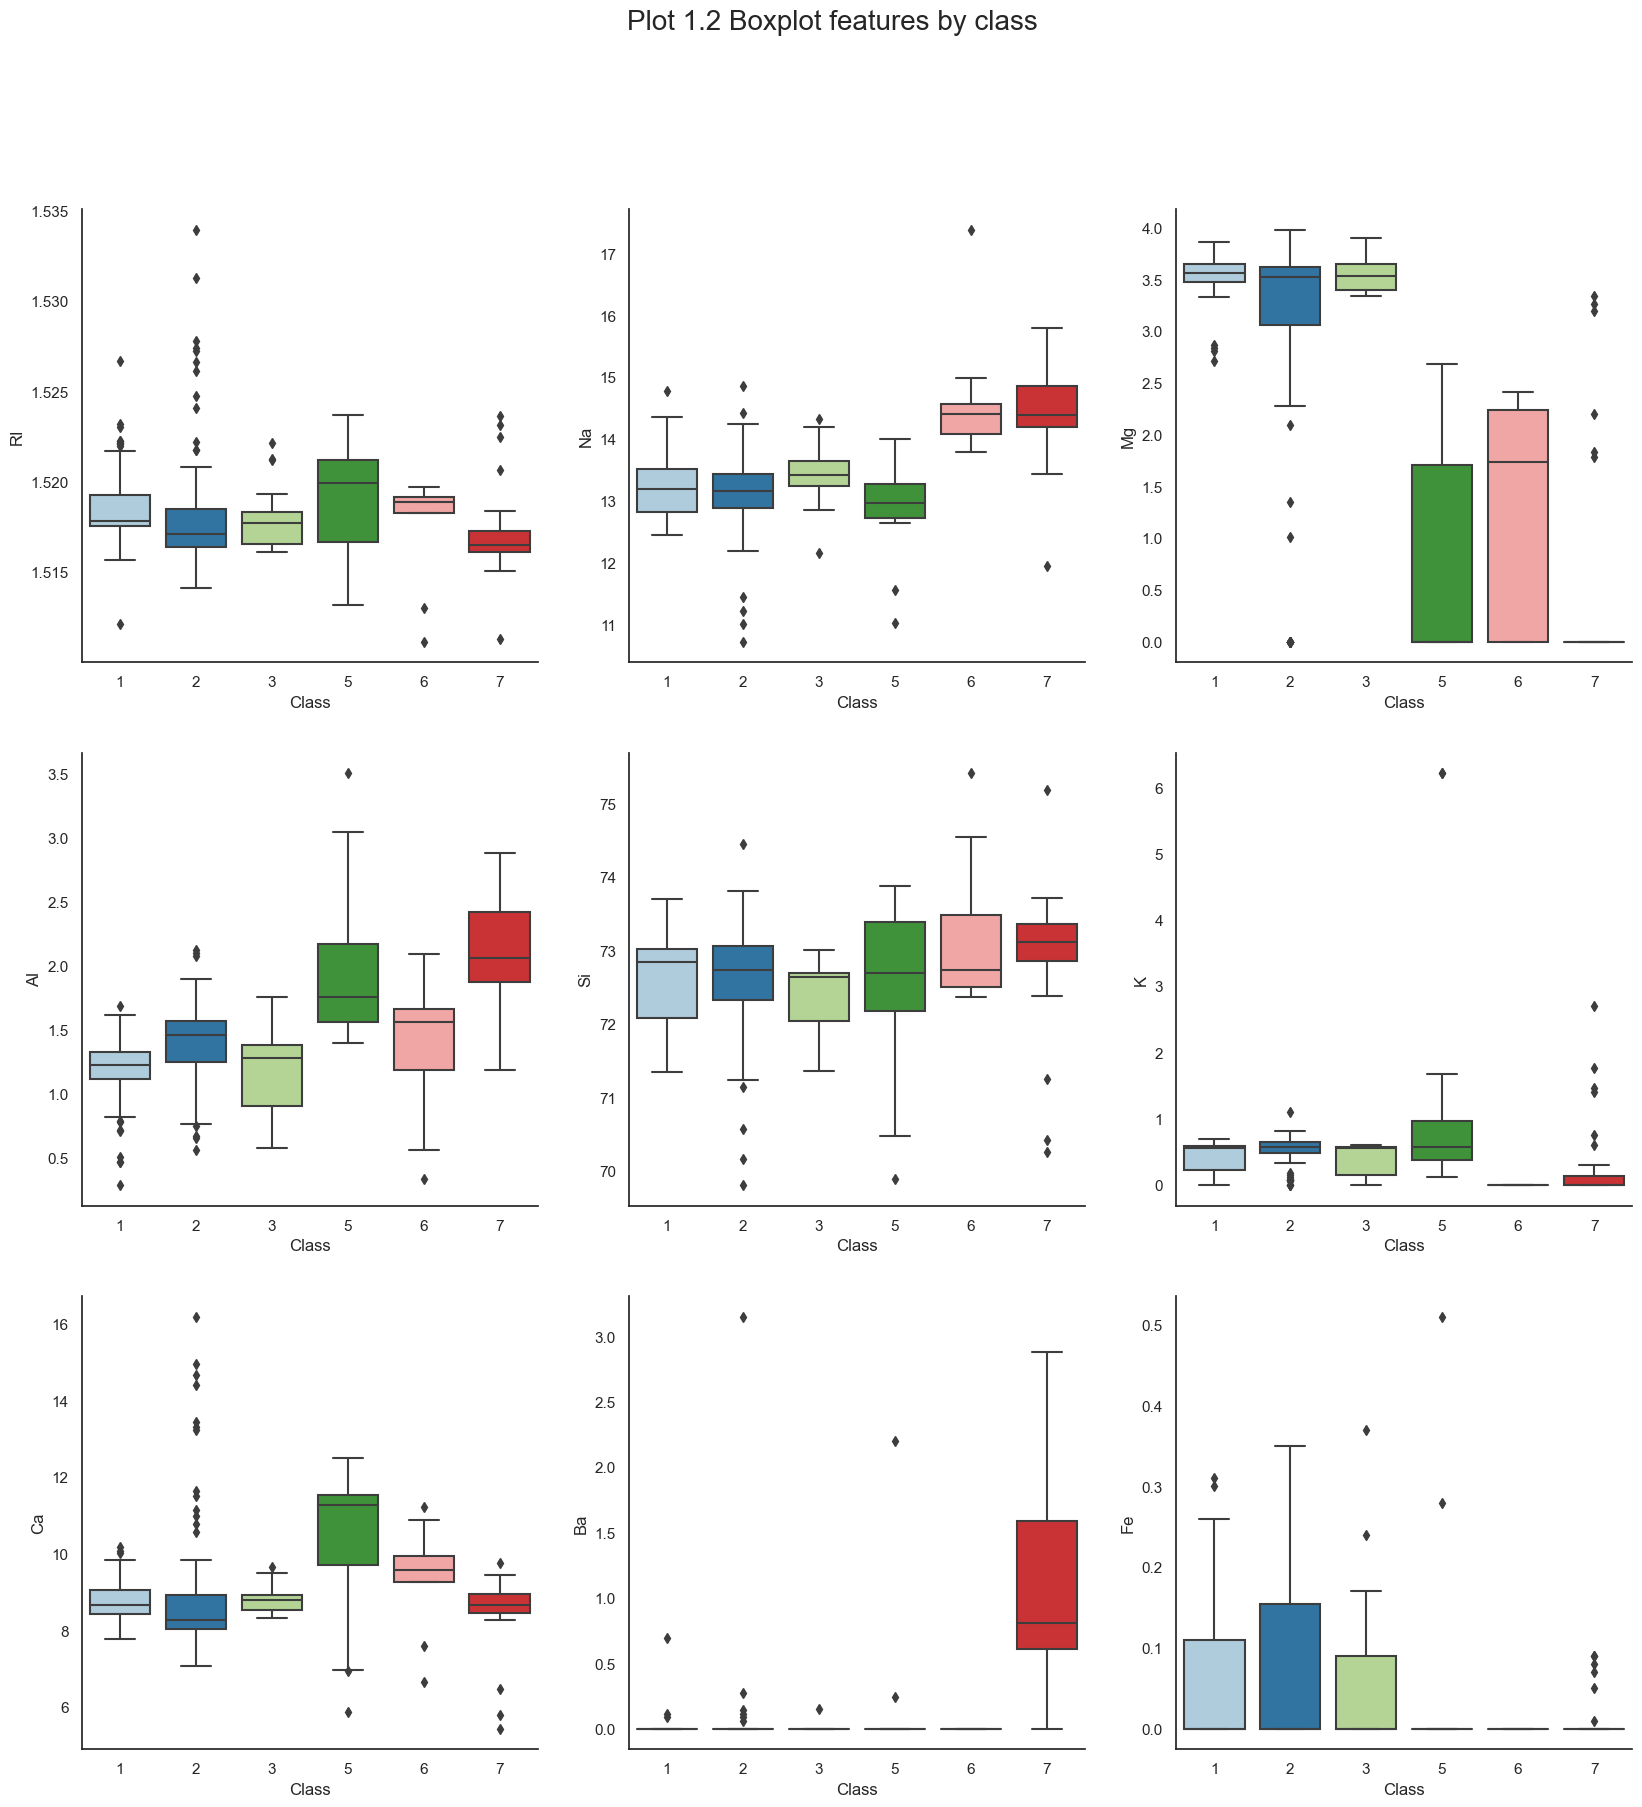

In [17]:
fig, axs = plt.subplots(ncols=3,nrows=3,figsize=(20, 20))
sns.boxplot(x='Class', y='RI', data=df, palette='Paired', ax=axs[0][0])
sns.boxplot(x='Class', y='Na', data=df, palette='Paired', ax=axs[0][1])
sns.boxplot(x='Class', y='Mg', data=df, palette='Paired', ax=axs[0][2])

sns.boxplot(x='Class', y='Al', data=df, palette='Paired', ax=axs[1][0])
sns.boxplot(x='Class', y='Si', data=df, palette='Paired', ax=axs[1][1])
sns.boxplot(x='Class', y='K', data=df, palette='Paired', ax=axs[1][2])

sns.boxplot(x='Class', y='Ca', data=df, palette='Paired', ax=axs[2][0])
sns.boxplot(x='Class', y='Ba', data=df, palette='Paired', ax=axs[2][1])
sns.boxplot(x='Class', y='Fe', data=df, palette='Paired', ax=axs[2][2])

sns.despine()
fig.suptitle('Plot 1.2 Boxplot features by class',fontsize=20)

Text(0.5, 1.02, 'Plot 1.3 Scatterplot Glass data set')

<Figure size 5000x5000 with 0 Axes>

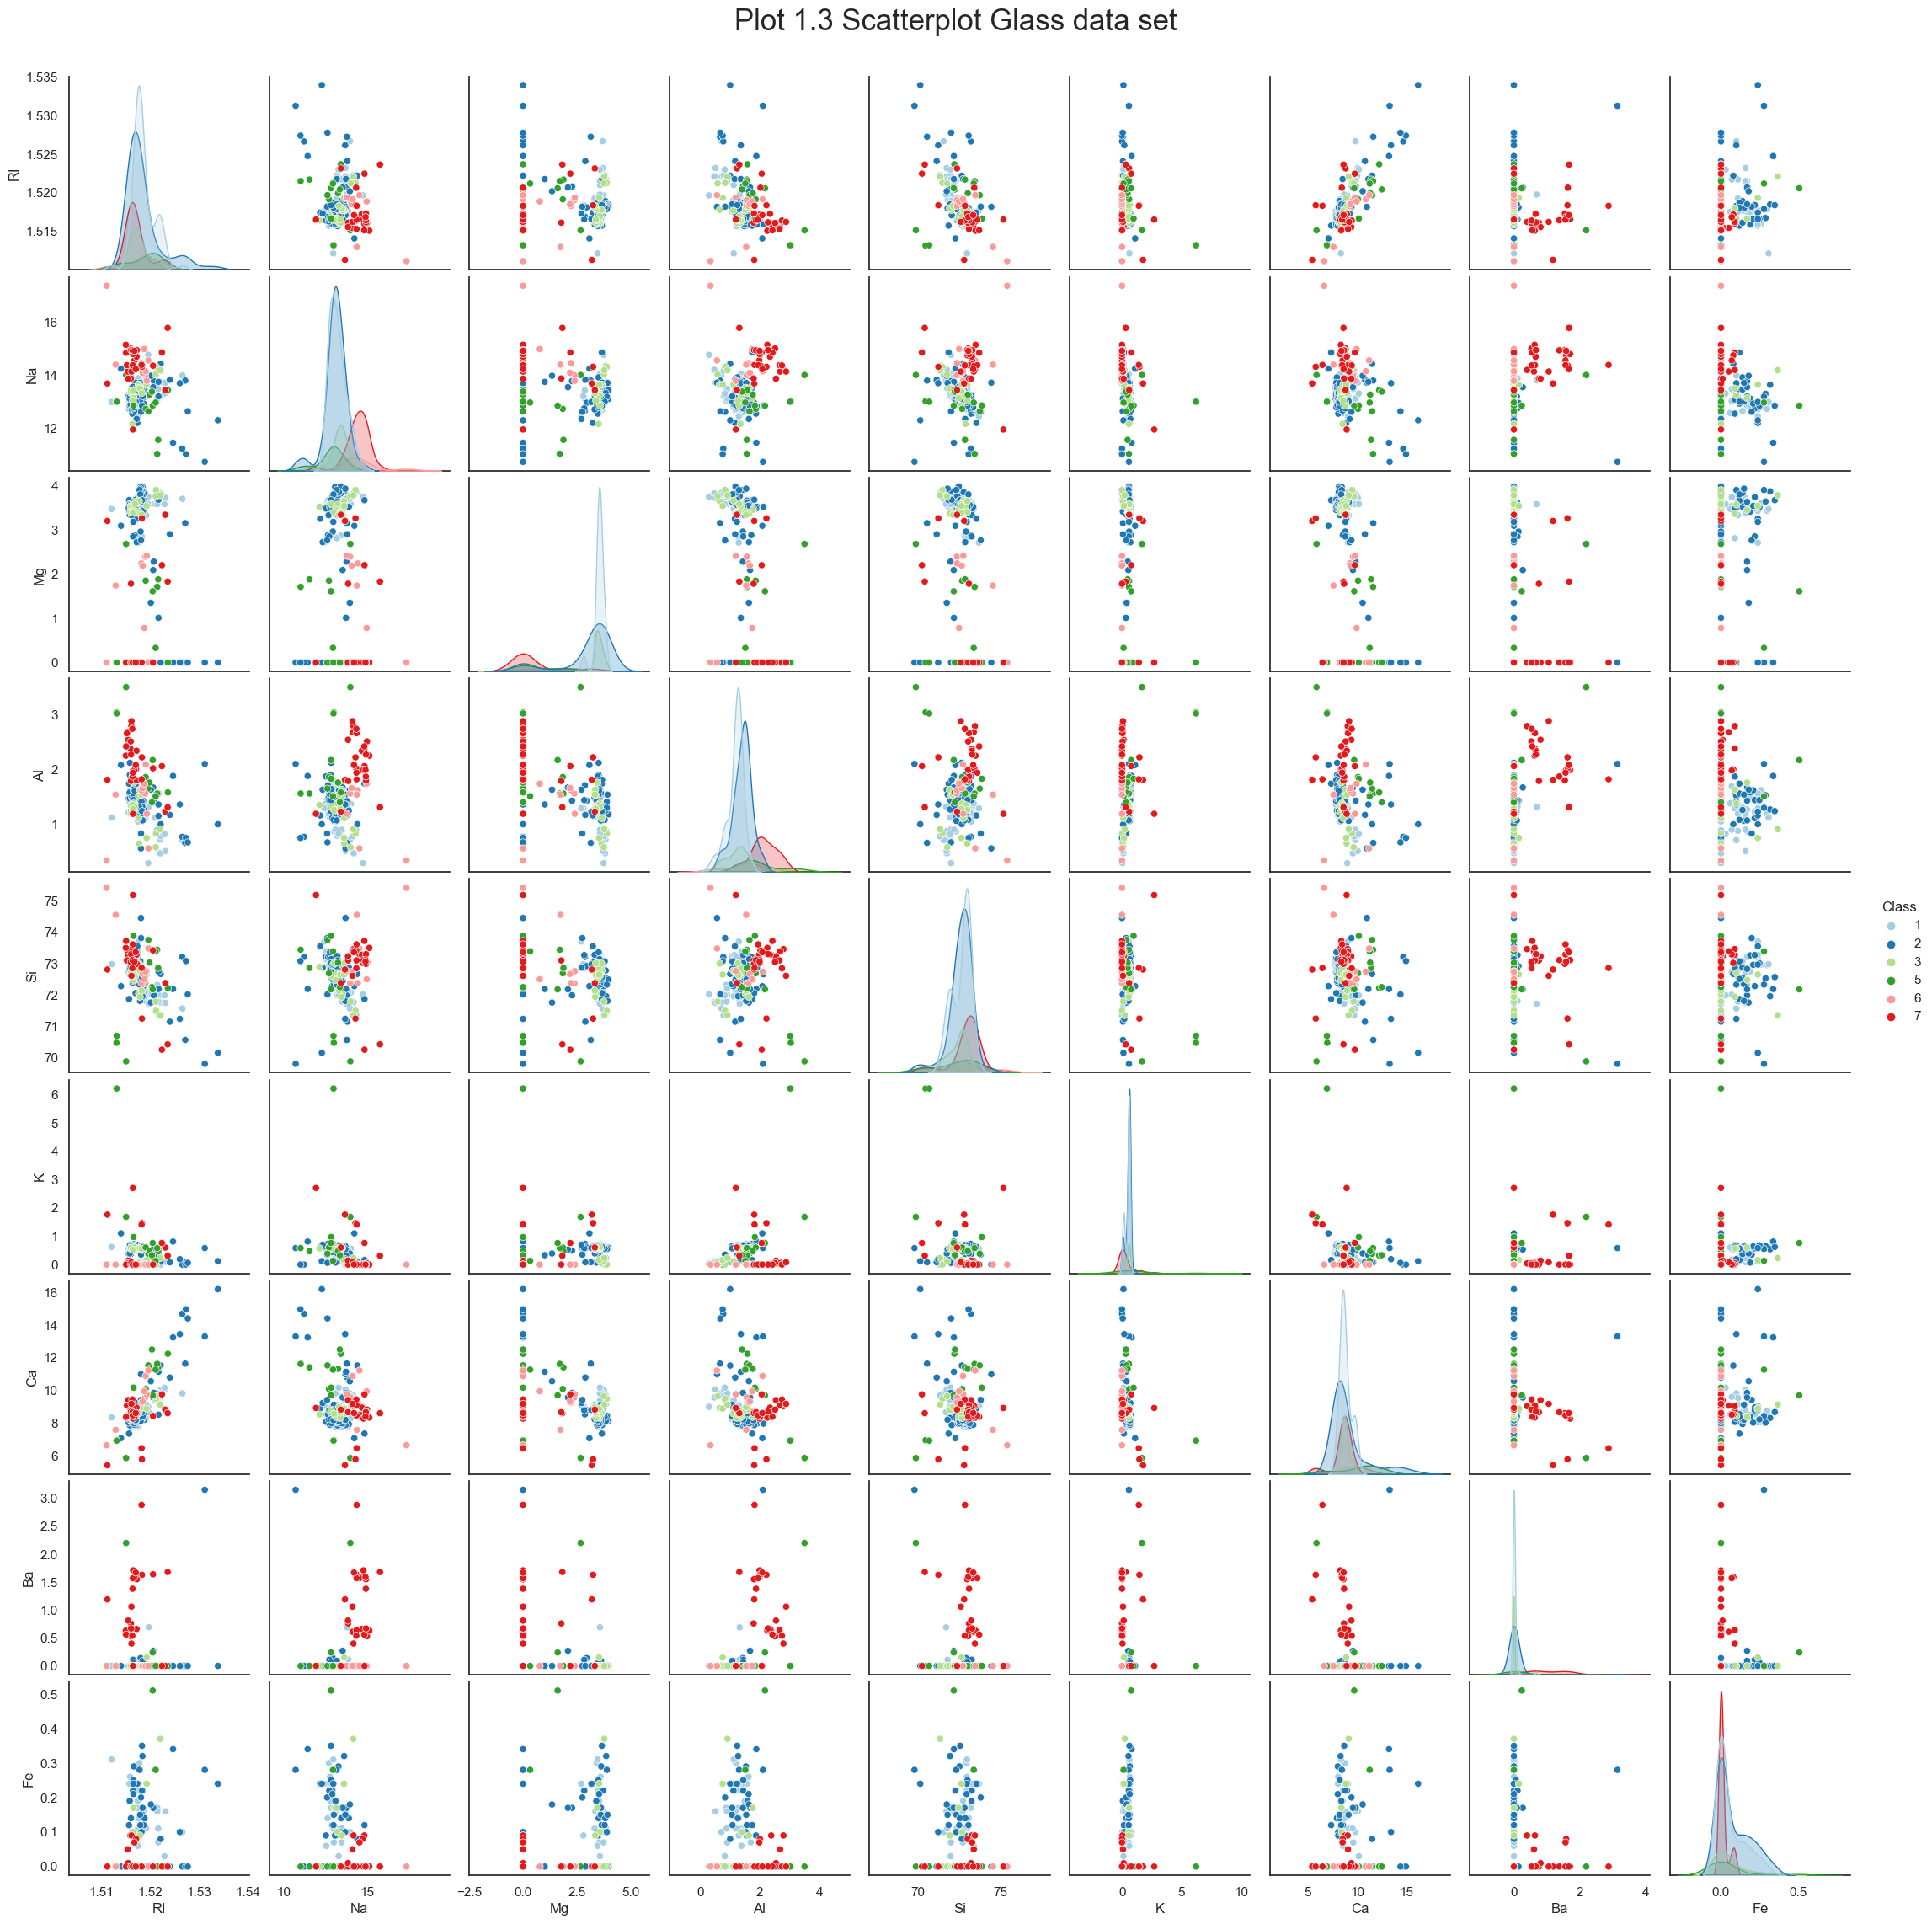

In [18]:
# distribution of features 
plt.figure(figsize=[50, 50])
sns.pairplot(df, vars=df.columns[:-1], hue='Class', palette='Paired')
plt.suptitle('Plot 1.3 Scatterplot Glass data set',y=1.02, horizontalalignment='center',fontsize=25)

Text(0.5, 0.95, 'Plot 1.4 Correlations between features')

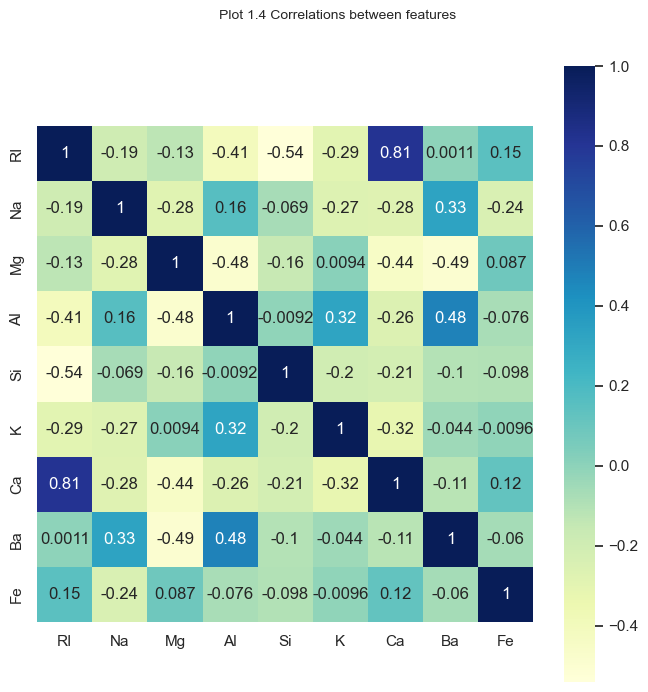

In [19]:
# correlation between features
plt.figure(figsize=[8, 8])
sns.heatmap(df.corr().loc["RI":"Fe","RI":"Fe"], square=True, annot=True, cmap='YlGnBu')
plt.suptitle('Plot 1.4 Correlations between features', fontsize=10, y=.95, horizontalalignment='center')

Text(0.5, 1.0, 'Plot 1.5 Glass types histogram')

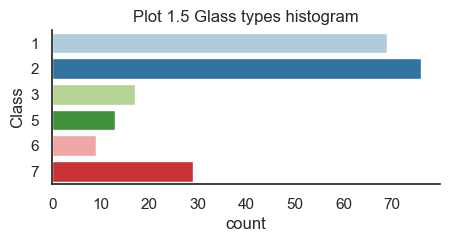

In [20]:
#The distribution of glass type
# glass type histogram
f, ax = plt.subplots(figsize=(5, 2))
sns.countplot(y="Class", data=df,palette='Paired')
sns.despine()
plt.title('Plot 1.5 Glass types histogram')

In [21]:
df['Class'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Class, dtype: int64

The data set is highly imbalanced. The two glass types (building windows) contributes 68% of observations.

In [22]:
# Separating out the features and target
X = df.values[:,:9]
y = df.values[:,9]

In [29]:
seed=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

n_estimators = 200
scalers=[
    ('Unscaled',None),
    ('Standard',StandardScaler()),
    ('Robust',RobustScaler(quantile_range=(25, 75)))
]

kfold = StratifiedKFold(n_splits=5, random_state=seed)
         
models = [
    ('DecisionTree',DecisionTreeClassifier(random_state=seed)),
    ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)),
    ('KNN',KNeighborsClassifier(n_neighbors=6)),
    ('SVC', SVC(kernel='rbf',random_state=seed))
]

names,scores=[],[]
for scaler in scalers:
    for model in models:
        pipe=Pipeline([scaler,model])
        cv_results = cross_val_score(pipe, X_train, y_train, scoring='accuracy',cv=kfold,n_jobs=1)
        scores.append(cv_results)
        names.append([scaler[0],model[0]])
        
scores_df=pd.DataFrame(scores)
names_df=pd.DataFrame(names,columns=['scaler','class'])
cl_df=pd.concat([names_df,scores_df],axis=1)
df_melt=pd.melt(cl_df,id_vars=['scaler','class'],value_vars=list(scores_df.columns))

f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="class", y="value", hue="scaler",data=df_melt,palette='RdBu',showfliers=False)
ax.set_title("Plot 2.1 Features normalization")
ax.set(xlabel='', ylabel='accuracy')
sns.despine()


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("Grades.csv")
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [38]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [39]:
df.isnull().sum().sum()

425

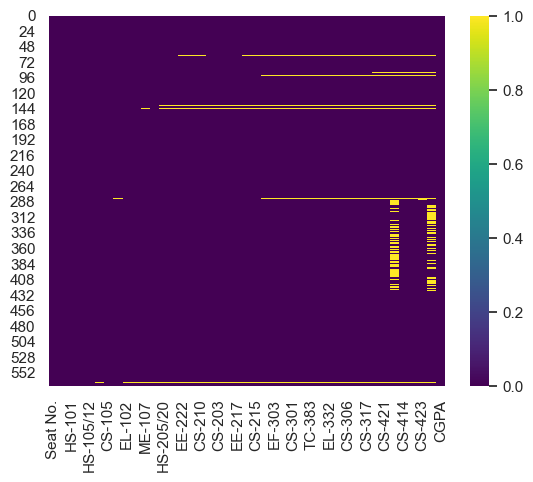

In [40]:
# Check if there is any missing value

sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [41]:
df.replace(np.nan,0, inplace = True)
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [42]:
input = df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = df[["CGPA"]]

In [43]:
target.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


In [44]:
pd.unique(df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [45]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}

In [46]:
type(input)

pandas.core.frame.DataFrame

In [47]:
for item in input:
      input[item] = input[item].replace(grades_enc)

input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [48]:
# Concating inputs and targets for data insights
df = pd.concat([input, target], axis=1)

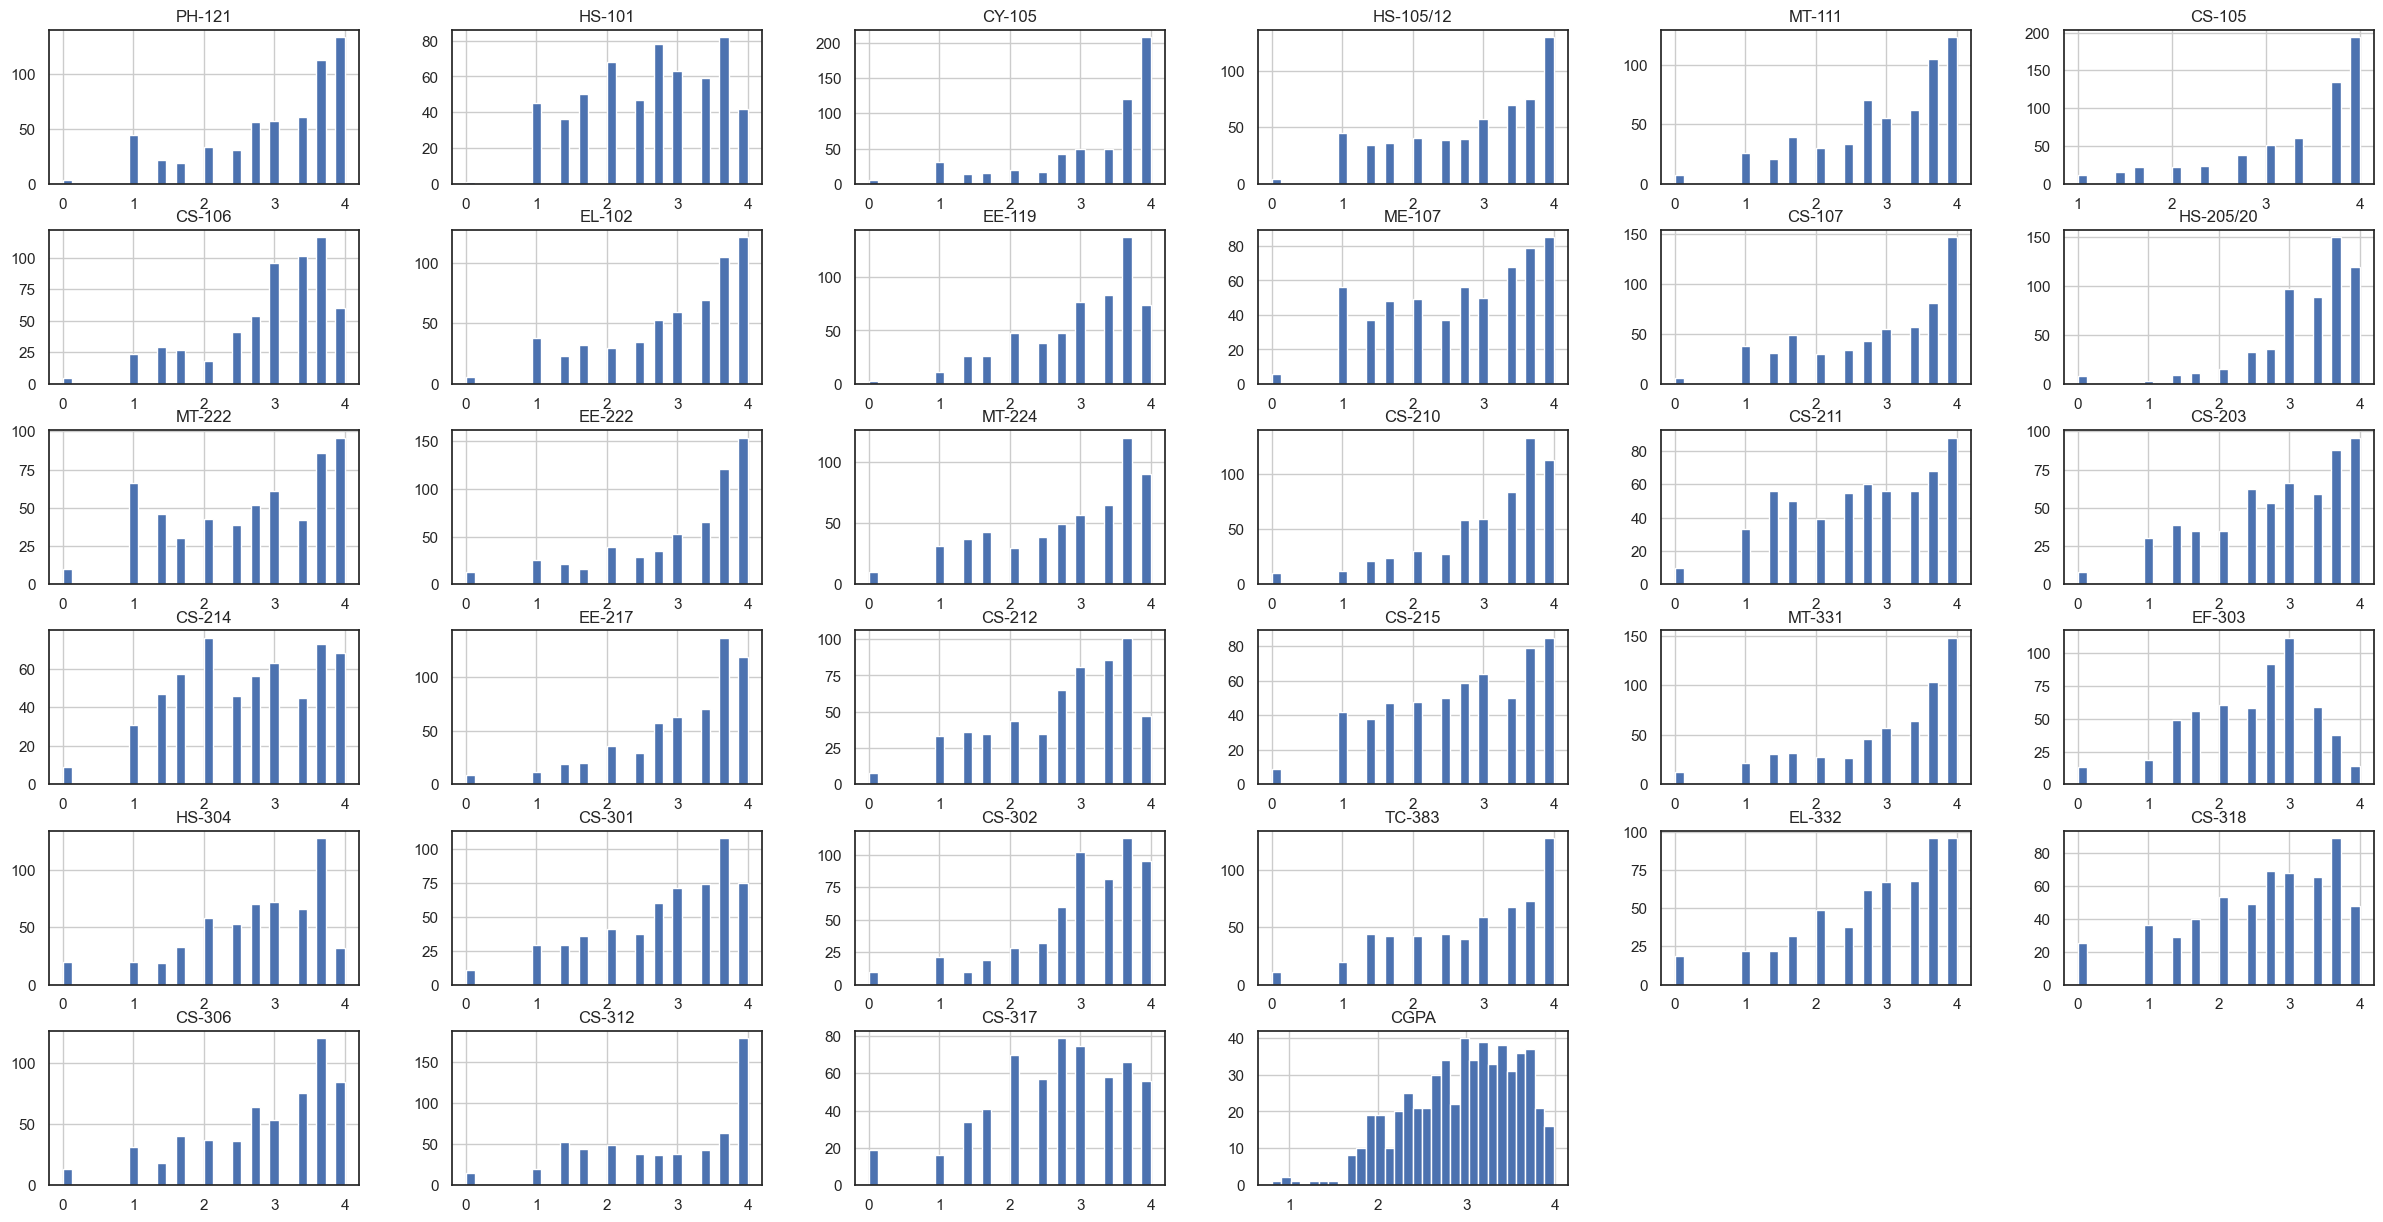

In [49]:
df.hist(bins=30,figsize=(30,15))
plt.show()

<AxesSubplot:>

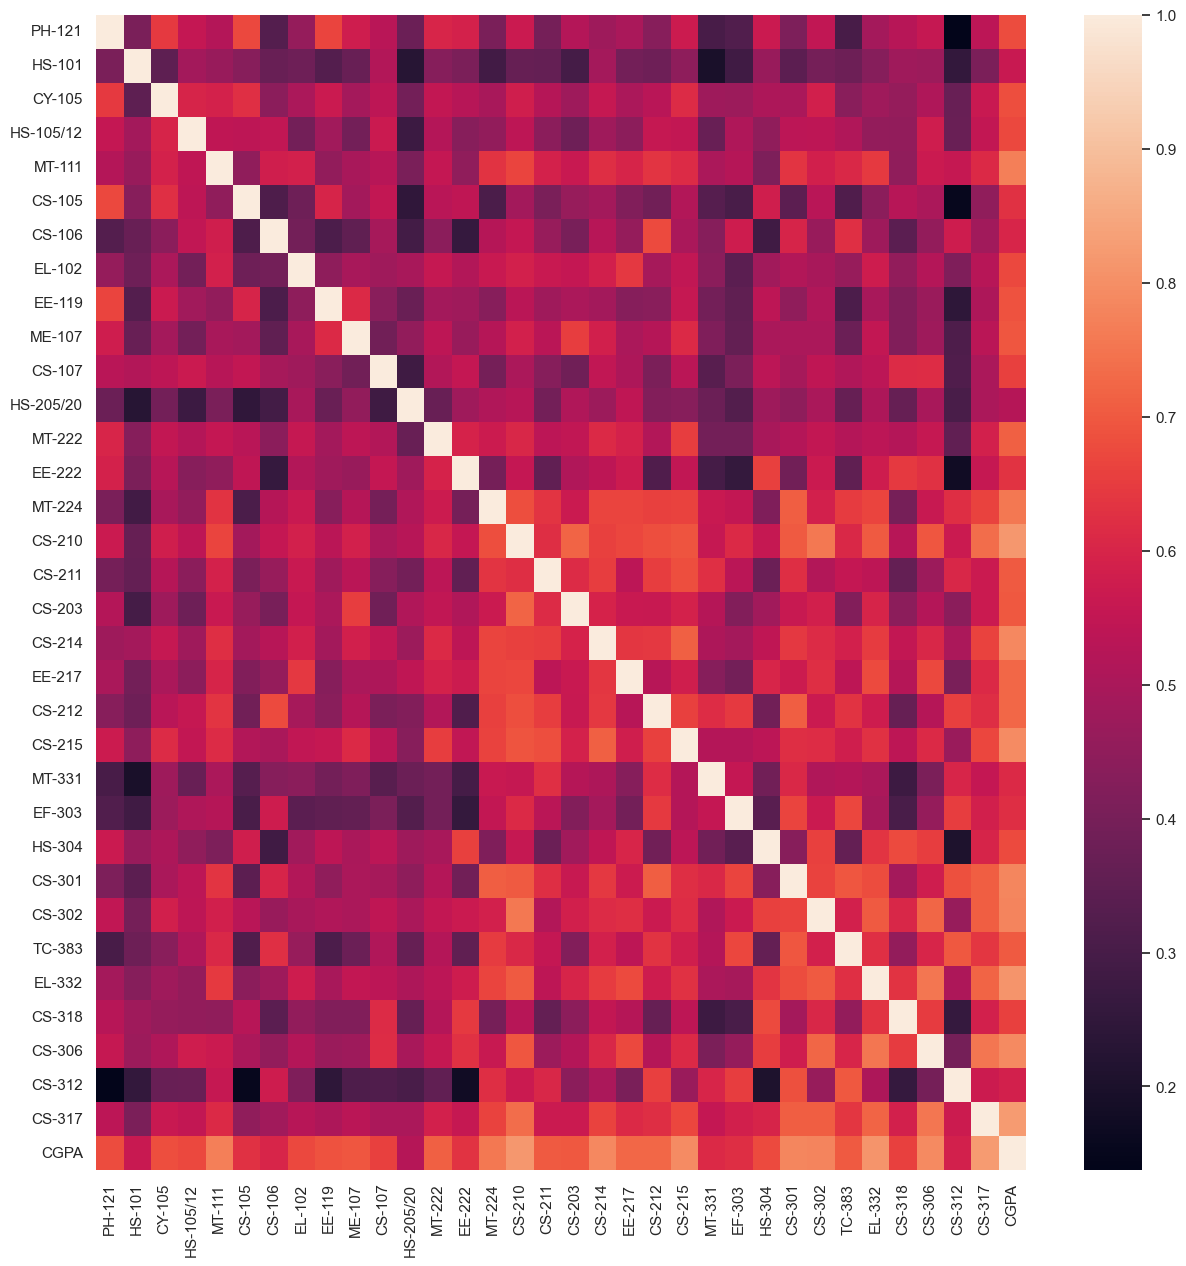

In [50]:
# Looking for correlations
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [51]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.262697,2.878984,2.988091,3.329247,2.961996,2.969877,3.020140,2.698599,...,2.761646,2.850788,3.050088,2.873730,2.863748,2.628371,2.892119,2.892294,2.651138,2.954888
std,0.971594,0.908402,0.932997,1.019208,0.954343,0.799826,0.869226,0.981676,0.839463,1.029323,...,0.955712,0.970483,0.877124,1.017053,1.009585,1.035205,0.989909,1.095450,0.952455,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.700000,2.000000,2.000000,2.000000,2.400000,2.000000,2.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,3.000000,3.400000,3.000000,3.000000,2.700000,3.000000,3.000000,2.700000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,3.700000,3.700000,3.700000,3.700000,3.400000,3.700000,4.000000,3.400000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000
